# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import random

import sklearn
import scipy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["success", "failure"]

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Loading the data

In [2]:
df=pd.read_csv('C:/Users/vishu/Downloads/Micro-Credit-Project/Micro Credit Project/Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
# dataset has 209593 rows and 37 columns
df.shape

(209593, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

It has no null values

# SUMMARY STATISTICS

In [8]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [ ]:
# Dropping useless columns
df1=df.drop(['Unnamed: 0','aon','pdate','pcircle','msisdn'], axis=1)
df1.head()

In [10]:
df1.shape

(209593, 32)

# Univariate analysis

<AxesSubplot:>

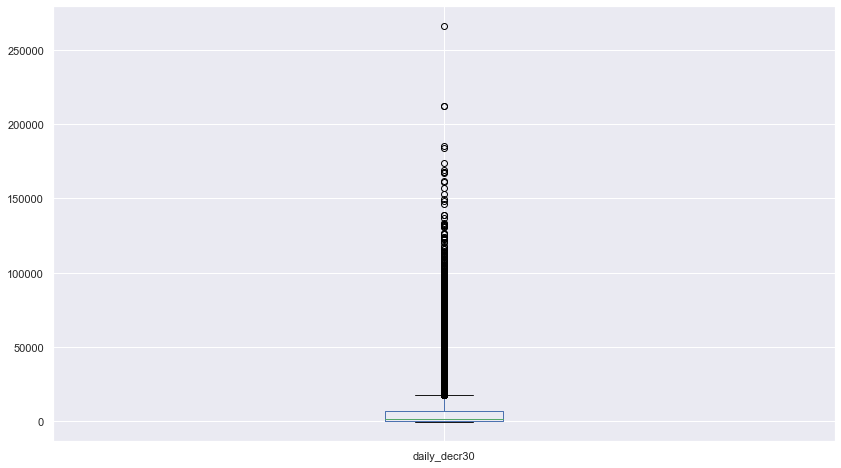

In [11]:
df1['daily_decr30'].plot.box()

<AxesSubplot:>

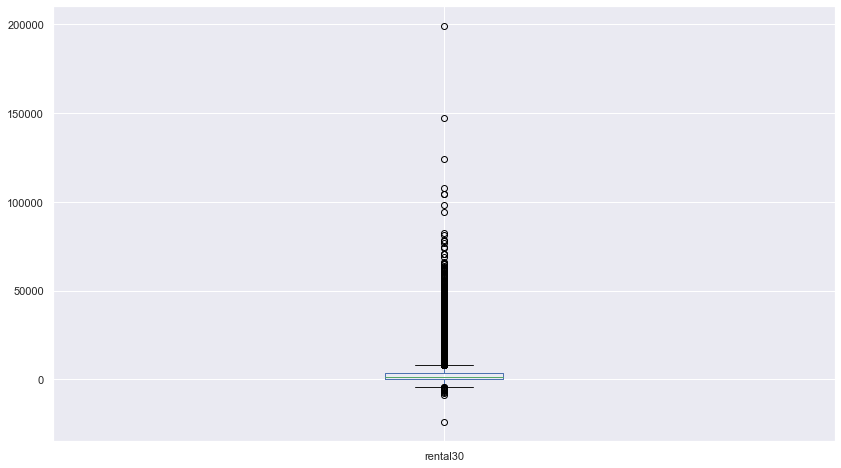

In [12]:
df1['rental30'].plot.box()

<AxesSubplot:>

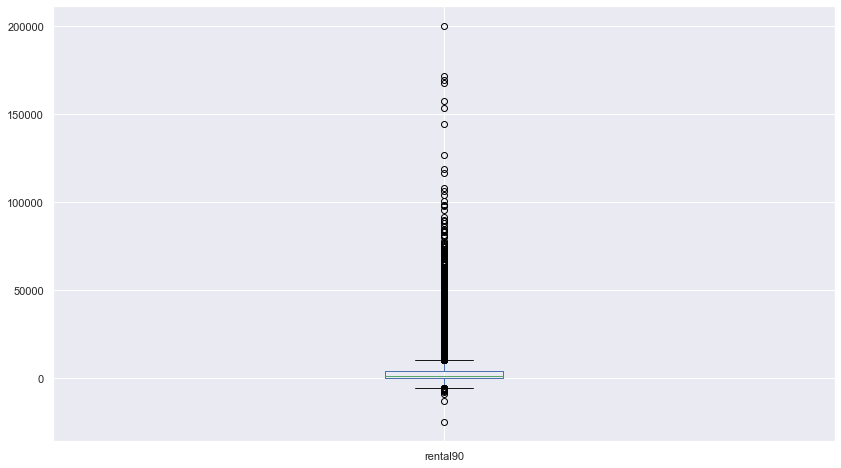

In [13]:
df1['rental90'].plot.box()

<AxesSubplot:>

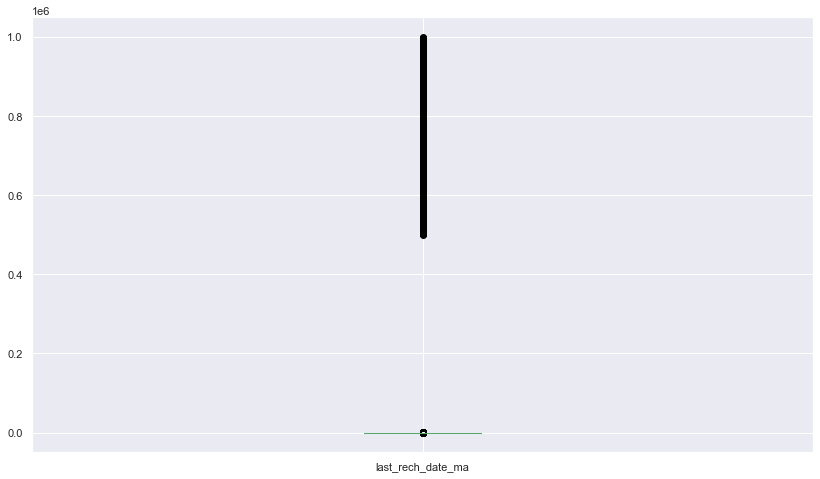

In [14]:
df1['last_rech_date_ma'].plot.box()

<AxesSubplot:>

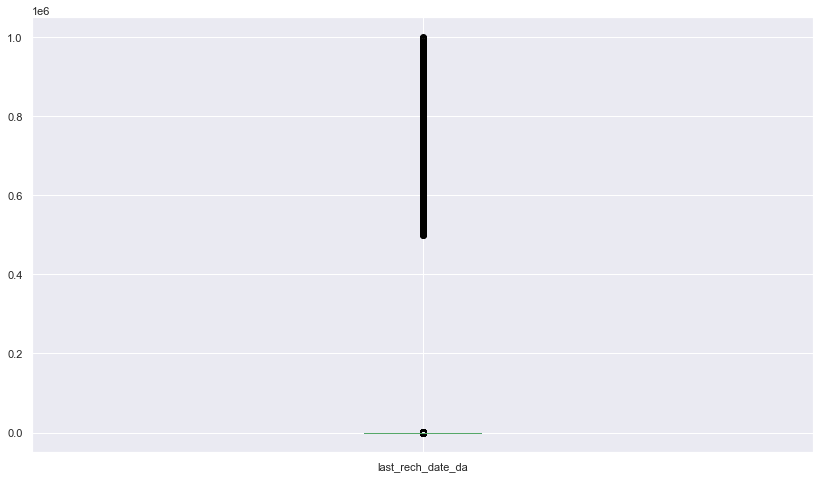

In [15]:
df1['last_rech_date_da'].plot.box()

<AxesSubplot:>

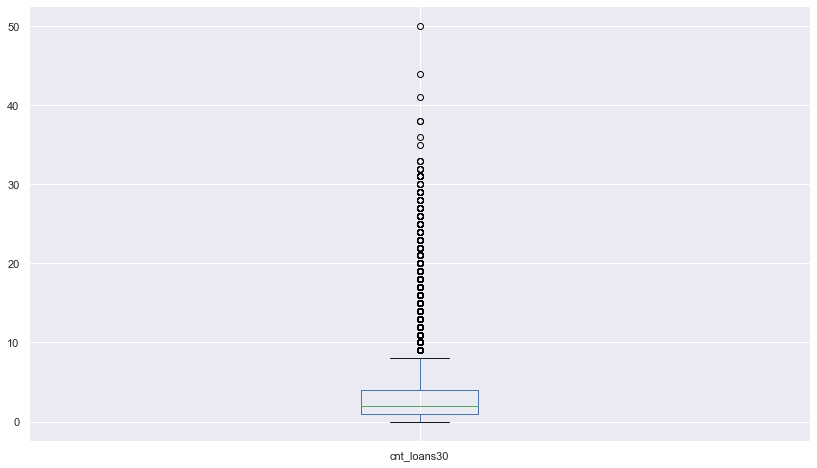

In [16]:
df1['cnt_loans30'].plot.box()

label                       AxesSubplot(0.125,0.71587;0.0824468x0.16413)
daily_decr30             AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
daily_decr90             AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
rental30                 AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
rental90                 AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
last_rech_date_ma        AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
last_rech_date_da        AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
last_rech_amt_ma         AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
cnt_ma_rech30              AxesSubplot(0.125,0.518913;0.0824468x0.16413)
fr_ma_rech30            AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
sumamnt_ma_rech30       AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
medianamnt_ma_rech30    AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
medianmarechprebal30    AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
cnt_ma_rech90           AxesSubplot(0.619681,0.5189

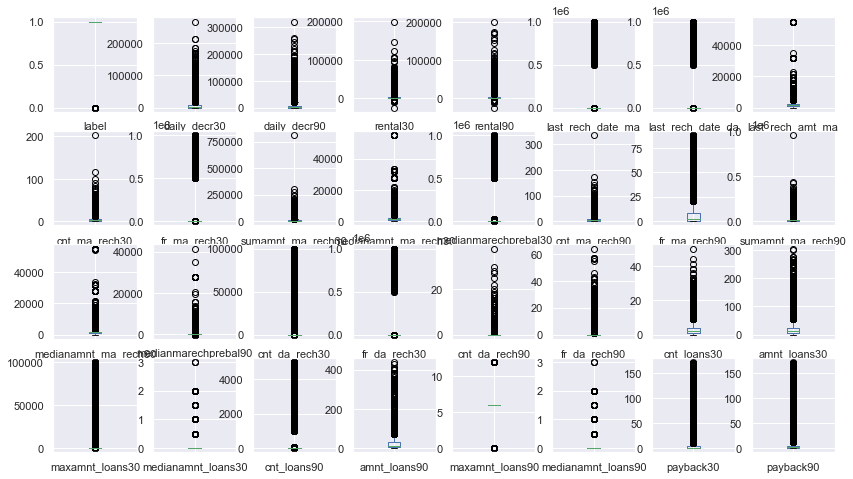

In [17]:
df1.plot(kind='box',subplots=True,layout=(4,8))

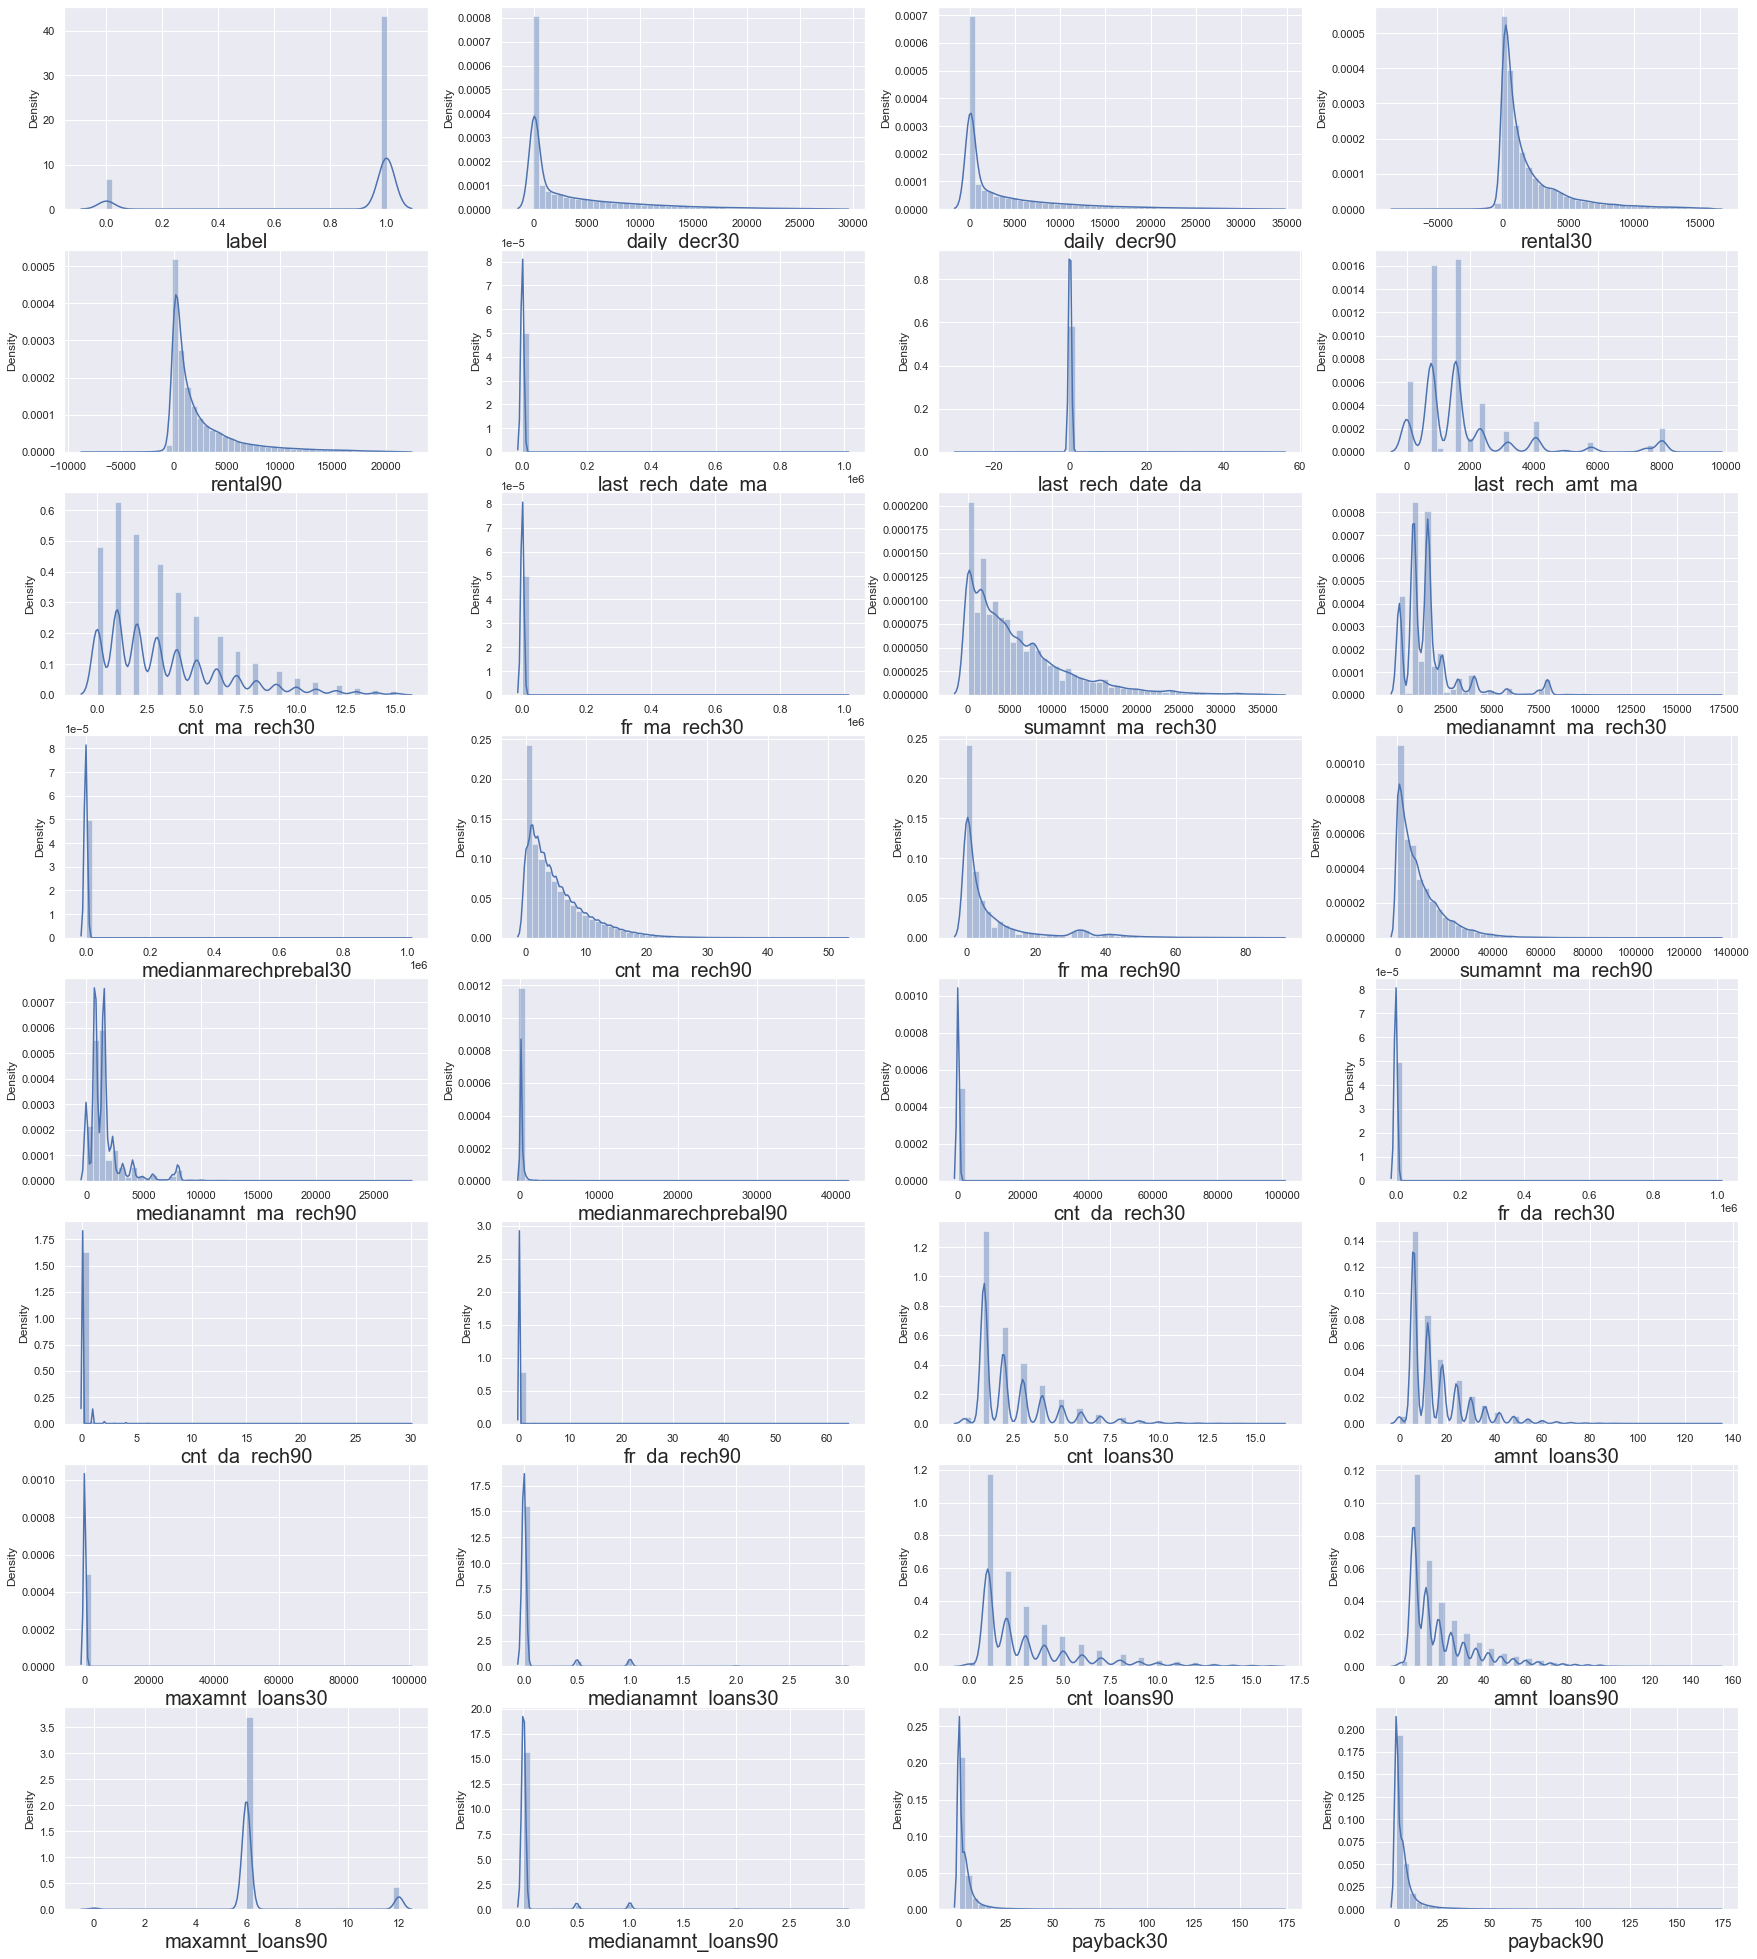

In [82]:
plt.figure(figsize=(30,35),facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()        



# Exploring target variable

In [18]:
df1.label.unique()

array([0, 1], dtype=int64)

In [19]:
df1['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:>

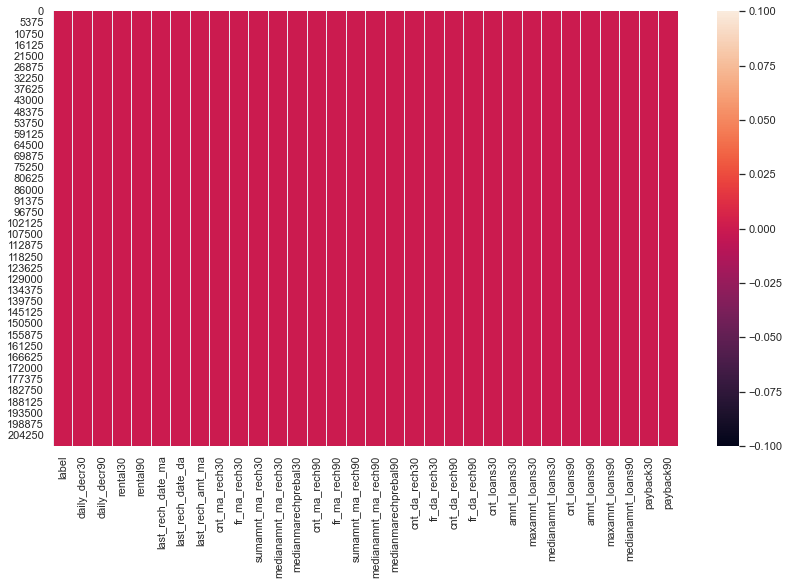

In [20]:
sns.heatmap(df1.isnull())

In [21]:
df1cor=df1.corr()
df1cor

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
daily_decr30,0.168298,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362
fr_ma_rech30,0.001330,-0.000577,-0.000343,-0.001219,-0.000503,-0.001629,0.001158,0.002876,0.001669,1.000000,...,0.002666,0.002470,-0.001100,-0.000331,0.003368,0.002634,-0.001890,-0.001292,0.001455,0.000998


<AxesSubplot:>

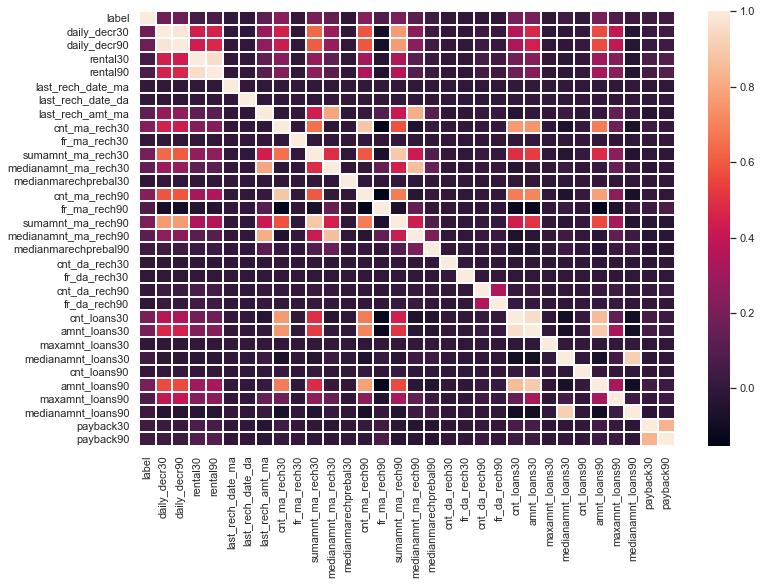

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df1cor,linewidths=1)

<AxesSubplot:>

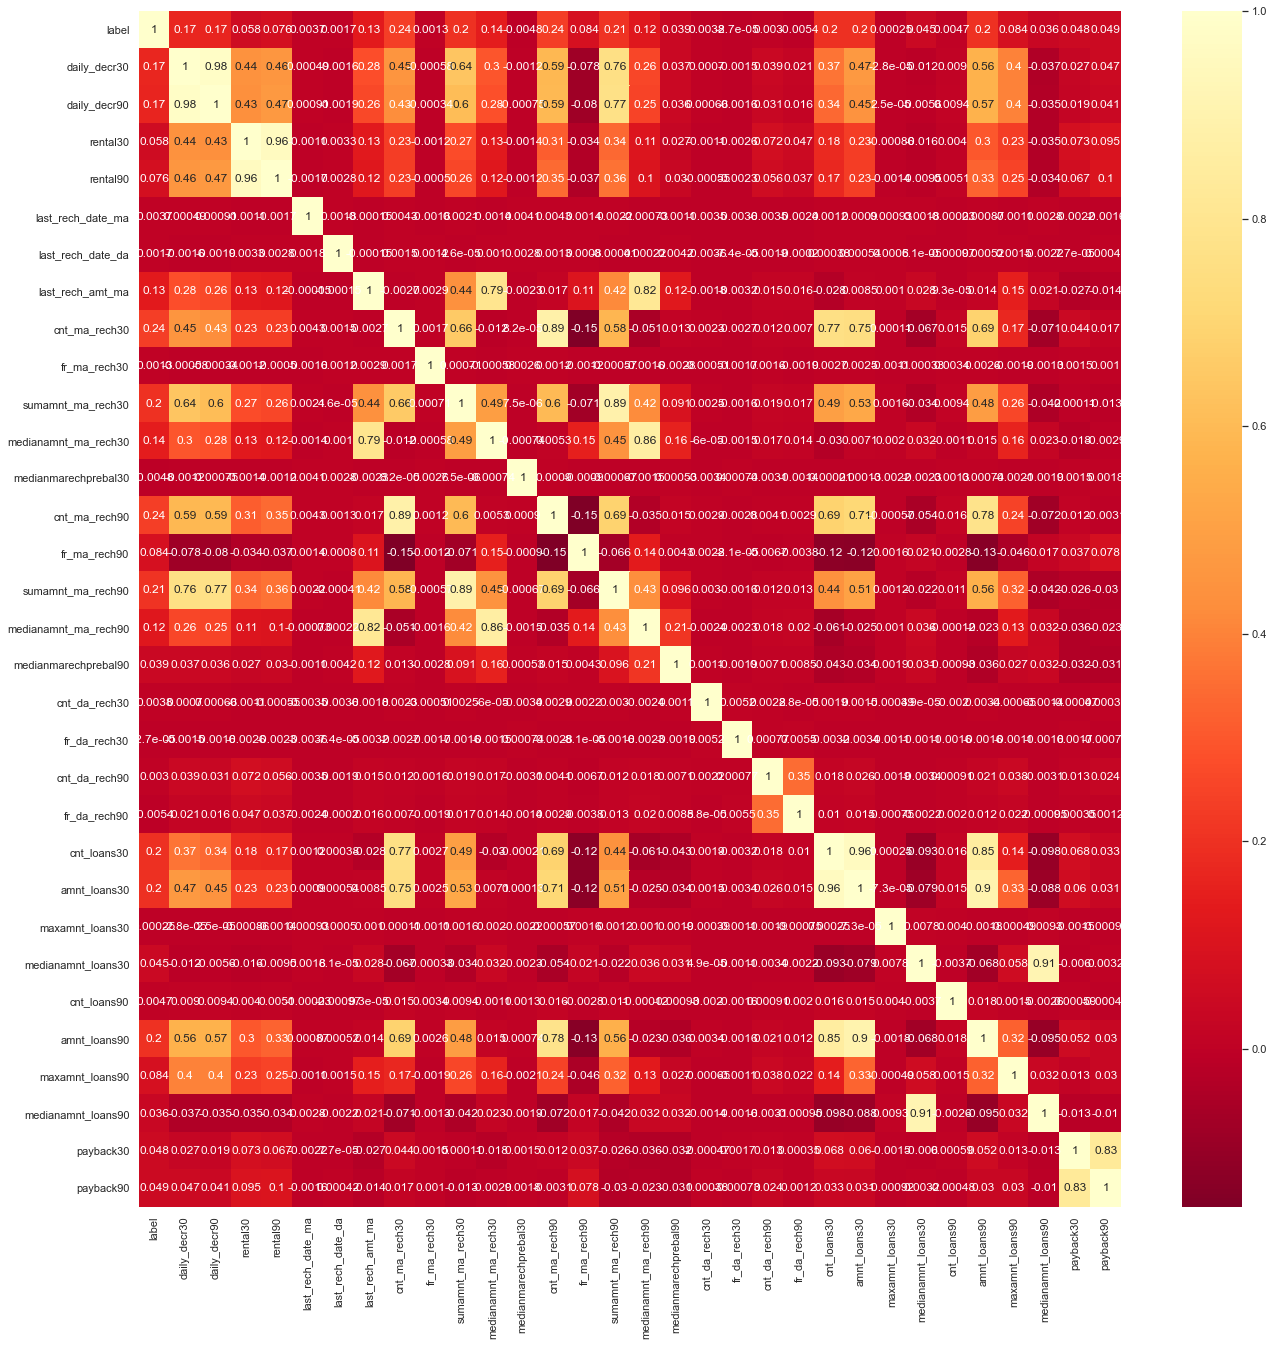

In [23]:
plt.figure(figsize=(22,22))
sns.heatmap(df1cor,cmap='YlOrRd_r',annot=True)

<AxesSubplot:xlabel='rental30', ylabel='Density'>

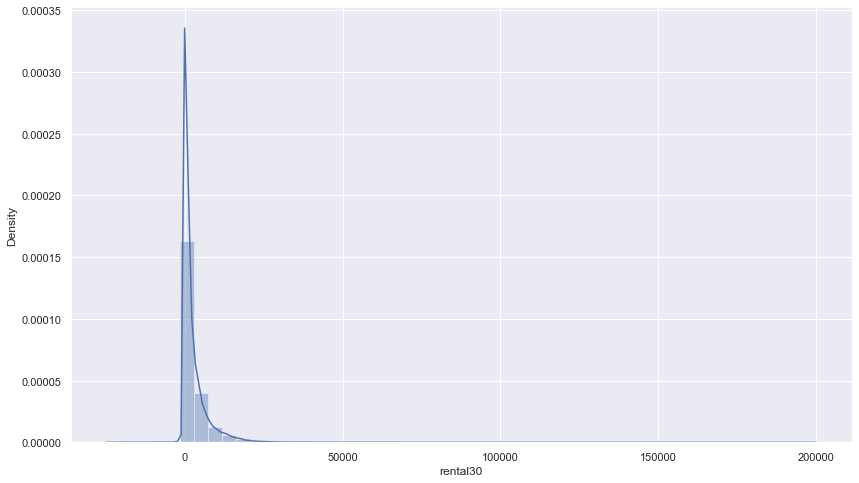

In [24]:
sns.distplot(df1['rental30'])

<AxesSubplot:xlabel='rental90', ylabel='Density'>

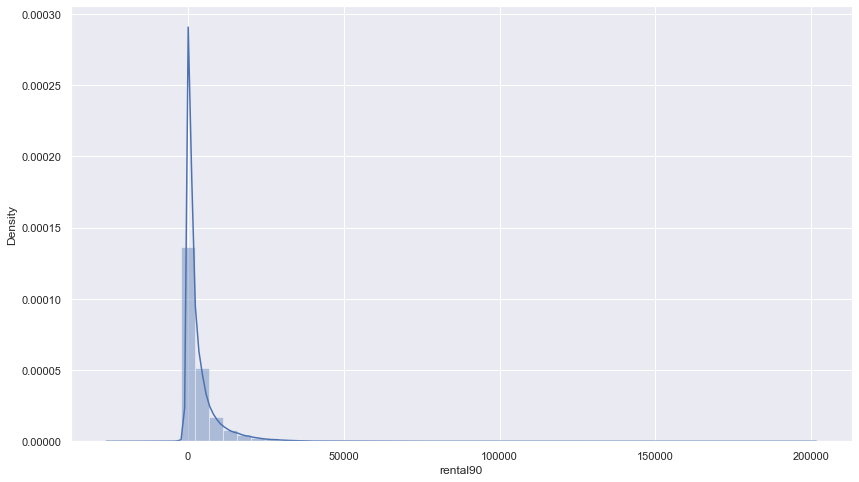

In [25]:
sns.distplot(df1['rental90'])

<AxesSubplot:xlabel='rental90', ylabel='Density'>

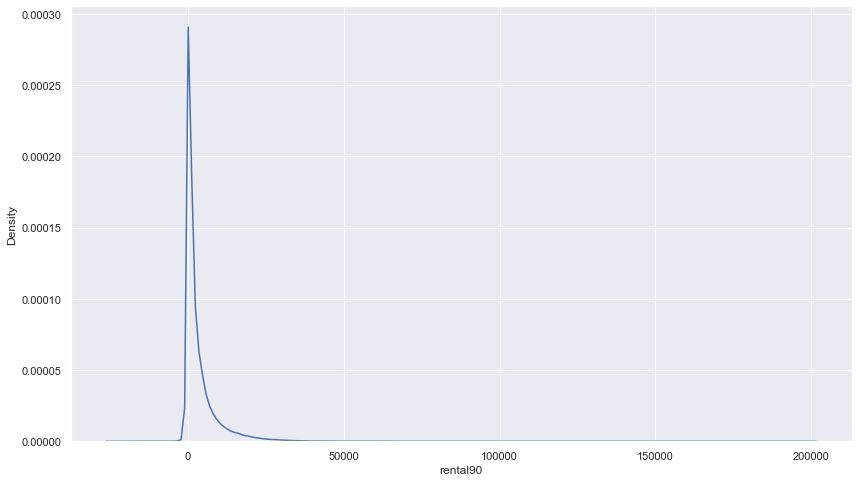

In [26]:
sns.kdeplot(df1['rental90'])

<AxesSubplot:xlabel='label', ylabel='count'>

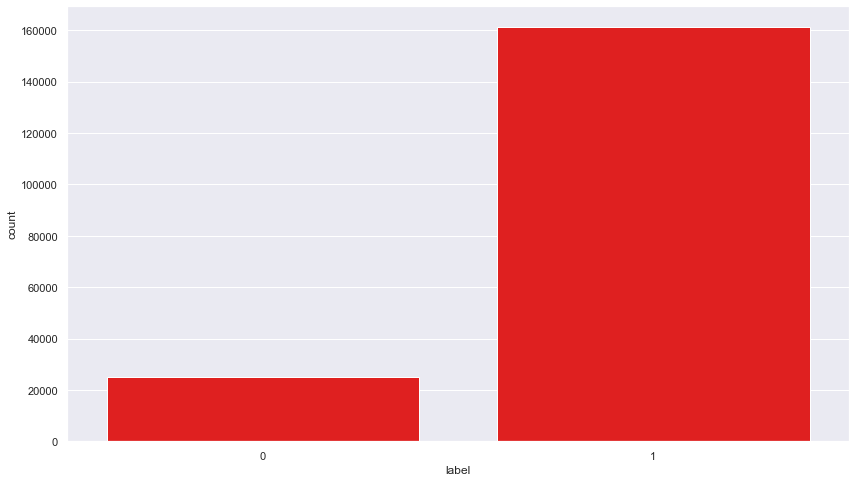

In [83]:
sns.countplot(x='label',data=df1,color='Red')

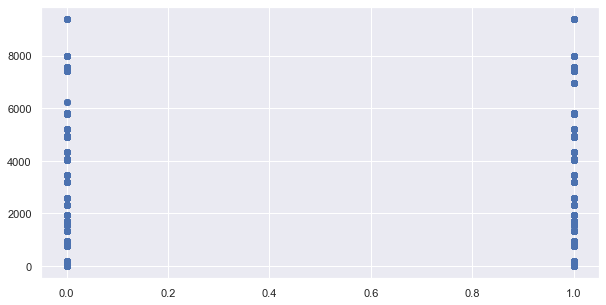

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(df1['label'],df1['last_rech_amt_ma'])

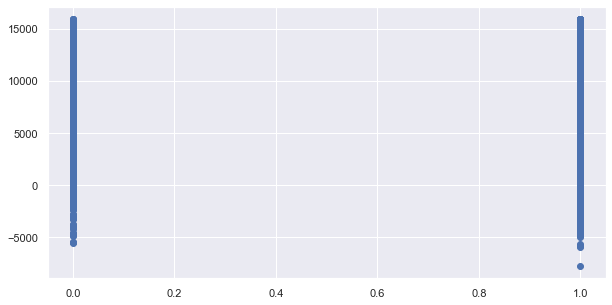

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(df1['label'],df1['rental30'])

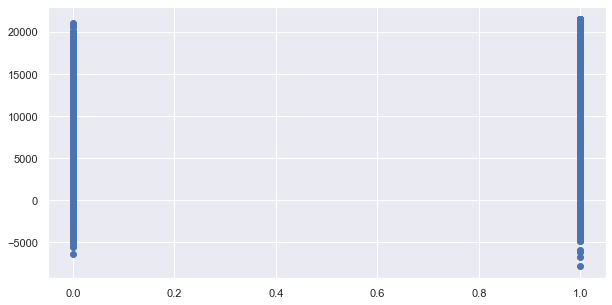

In [88]:
plt.figure(figsize=(10,5))
plt.scatter(df1['label'],df1['rental90'])

# Removing Outliers

In [27]:
# Q1=df1.quantile(0.25)
 #Q1

In [28]:
# Q3=df1.quantile(0.75)
 #Q3

In [29]:
#IQR=Q3-Q1
#IQR

In [30]:
#print(df1<(Q1-(1.5 * IQR))| (df1 > Q3 + (1.5 * IQR)))

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

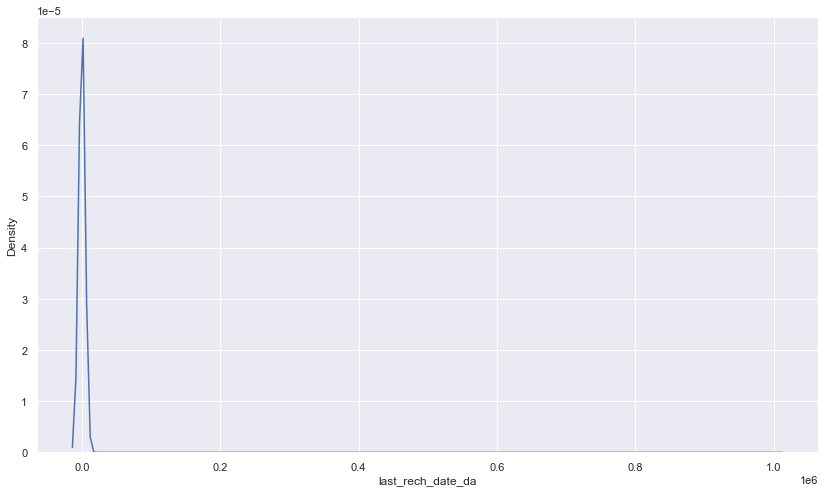

In [31]:
# removing skewness from single column one by one using quantile method
quant = df1["last_rech_date_da"].quantile(.99) # tried with multiple quantiles, this is the optimal 
# remember all the skewness will not go away, but we have removed the majority of the extreme points
# this can be seen from both of the graphs
new = df1["last_rech_date_da"][df1["last_rech_date_da"] < quant]
sns.kdeplot(df1["last_rech_date_da"])

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

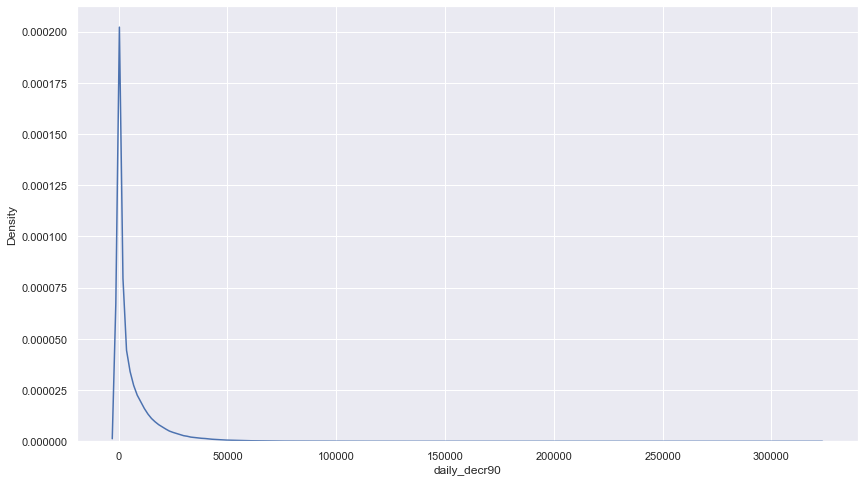

In [32]:
quant = df1["daily_decr90"].quantile(.97) 
new = df1["daily_decr90"][df1["daily_decr90"] < quant] 
# we need to be carefull with the data loss, we cannot remove all the extreme tail
# we need to take a decision to remove how much data loss we can afford
sns.kdeplot(df1["daily_decr90"])

In [33]:
quant = df1["daily_decr30"].quantile(.97)
quant = df1["rental30"].quantile(.98)
quant = df1["rental90"].quantile(.98)
quant = df1["last_rech_amt_ma"].quantile(.98)
quant = df1["sumamnt_ma_rech30"].quantile(.98)
quant = df1["cnt_loans90"].quantile(.98)
quant = df1["cnt_ma_rech30"].quantile(.98)

In [34]:
quant1 = df1["last_rech_date_da"].quantile(.99)
quant2 = df1["daily_decr90"].quantile(.97)
quant3 = df1["daily_decr30"].quantile(.97)
quant4= df1["rental30"].quantile(.98)
quant5 = df1["rental90"].quantile(.98)
quant6= df1["last_rech_amt_ma"].quantile(.98)
quant7 = df1["sumamnt_ma_rech30"].quantile(.98)
quant8 = df1["cnt_loans90"].quantile(.98)
quant9 = df1["cnt_ma_rech30"].quantile(.98)



In [35]:
df1 = df1[df1["last_rech_date_da"] < quant1] # removing the outliers
print(df1.shape)
df1 = df1[df1["daily_decr90"] < quant2] # removing the outliers
print(df1.shape)
df1 = df1[df1["daily_decr30"] < quant3] # removing the outliers
print(df1.shape)
df1 = df1[df1["rental30"] < quant4] # removing the valuesoutliers
print(df1.shape)
df1 = df1[df1["rental90"] < quant5] # removing the values outliers
print(df1.shape)
df1 = df1[df1["last_rech_amt_ma"] < quant6] # removing the outliers
print(df1.shape)
df1 = df1[df1["sumamnt_ma_rech30"] < quant7] # removing the outliers
print(df1.shape)
df1 = df1[df1["cnt_loans90"] < quant8] # removing the outliers
print(df1.shape)
df1 = df1[df1["cnt_ma_rech30"] < quant9] # removing the outliers
print(df1.shape)


(207477, 32)
(201298, 32)
(200172, 32)
(196864, 32)
(196021, 32)
(192809, 32)
(191242, 32)
(188311, 32)
(186395, 32)


Observations:
    After removing outliers , we observe that we have lost 10% of the data.

# Seperating Independent and Target variable (label)

In [36]:
x=df1.drop('label',axis=1)
y=df1['label']

In [37]:
x

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [38]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 186395, dtype: int64

In [39]:
x.skew()

daily_decr30             1.818668
daily_decr90             1.918581
rental30                 2.185882
rental90                 2.241576
last_rech_date_ma       14.883374
last_rech_date_da        8.846927
last_rech_amt_ma         2.108949
cnt_ma_rech30            1.223363
fr_ma_rech30            14.791207
sumamnt_ma_rech30        1.603071
medianamnt_ma_rech30     2.355906
medianmarechprebal30    14.707024
cnt_ma_rech90            1.600883
fr_ma_rech90             2.200811
sumamnt_ma_rech90        1.890941
medianamnt_ma_rech90     2.438163
medianmarechprebal90    44.624905
cnt_da_rech30           17.748070
fr_da_rech30            14.696455
cnt_da_rech90           24.338644
fr_da_rech90            29.543115
cnt_loans30              1.749866
amnt_loans30             1.828860
maxamnt_loans30         17.791921
medianamnt_loans30       4.498224
cnt_loans90              1.782266
amnt_loans90             1.863919
maxamnt_loans90          1.942084
medianamnt_loans90       4.797518
payback30     

# Removing Skewness

In [40]:
# Applying power transform method to remove skewness 

In [41]:
from sklearn.preprocessing import power_transform
k=power_transform(x)
k=pd.DataFrame(k,columns=x.columns)

In [42]:
k.skew()

daily_decr30            -1.682232
daily_decr90            -1.791100
rental30                 0.207715
rental90                 0.248266
last_rech_date_ma       -5.019136
last_rech_date_da      -49.298688
last_rech_amt_ma        -0.161796
cnt_ma_rech30           -0.019635
fr_ma_rech30             0.173010
sumamnt_ma_rech30       -0.445344
medianamnt_ma_rech30    -0.288512
medianmarechprebal30    -0.135299
cnt_ma_rech90           -0.019008
fr_ma_rech90             0.141779
sumamnt_ma_rech90       -0.338174
medianamnt_ma_rech90    -0.140932
medianmarechprebal90     6.636411
cnt_da_rech30            6.941611
fr_da_rech30            11.552605
cnt_da_rech90            6.471776
fr_da_rech90            16.144663
cnt_loans30              0.032388
amnt_loans30             0.009848
maxamnt_loans30         -1.821323
medianamnt_loans30       3.405369
cnt_loans90              0.090031
amnt_loans90            -0.003429
maxamnt_loans90          0.445948
medianamnt_loans90       3.694660
payback30     

In [43]:
# Putting the correct data into x
x=k

In [44]:
import sklearn.neighbors._base

In [45]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# Handling Imbalance data using Over Sampling

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [47]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

In [48]:
# Now, u can see the data has been balanced (I/p and O/p values both)

In [49]:
y_smote.value_counts()

1    161219
0    161219
Name: label, dtype: int64

In [50]:
# Splitting the data into x and y using train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=.30,random_state=45)

# Standard Scaler

In [52]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7572158127610304
[[37528 10880]
 [12605 35719]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     48408
           1       0.77      0.74      0.75     48324

    accuracy                           0.76     96732
   macro avg       0.76      0.76      0.76     96732
weighted avg       0.76      0.76      0.76     96732



Accuracy is 76 prcnt.

# DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6354877393210107
[[41899  6509]
 [28751 19573]]
              precision    recall  f1-score   support

           0       0.59      0.87      0.70     48408
           1       0.75      0.41      0.53     48324

    accuracy                           0.64     96732
   macro avg       0.67      0.64      0.61     96732
weighted avg       0.67      0.64      0.62     96732



Accuracy is 64 prcnt

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7440247281147914
[[44851  3557]
 [21204 27120]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.78     48408
           1       0.88      0.56      0.69     48324

    accuracy                           0.74     96732
   macro avg       0.78      0.74      0.74     96732
weighted avg       0.78      0.74      0.74     96732



Accuracy is 77 prcnt

# Support Vector Classifier

In [56]:
#model:4 LinearSVC
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(x_train,y_train.ravel())

LinearSVC(random_state=0, tol=1e-05)

In [57]:
lsvc_pred = lsvc.predict(x_test)
print(accuracy_score(y_test,lsvc_pred))
print(confusion_matrix(y_test,lsvc_pred))
print(classification_report(y_test,lsvc_pred))

0.7560579746102634
[[37285 11123]
 [12474 35850]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     48408
           1       0.76      0.74      0.75     48324

    accuracy                           0.76     96732
   macro avg       0.76      0.76      0.76     96732
weighted avg       0.76      0.76      0.76     96732



Accuracy is 76 prcnt

# KNN Classifier

In [58]:
#model:5 KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.8670553694744242
[[46026  2382]
 [10478 37846]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     48408
           1       0.94      0.78      0.85     48324

    accuracy                           0.87     96732
   macro avg       0.88      0.87      0.87     96732
weighted avg       0.88      0.87      0.87     96732



Accuracy is 86 prcnt

we are getting highest accuracy with KNN Classifier but it can be due to overfitting also so we will check cross validation scores

In [59]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

Cross validation score of Logistic Regression model : 0.875205879986051


In [61]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :",scr.mean())

Cross validation score of Decision Tree model : 0.8566646101022023


In [62]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

Cross validation score of Random Forest model : 0.9056788003970064


In [63]:
scr=cross_val_score(lsvc,x,y,cv=5)
print("Cross validation score of LinearSVC model :",scr.mean())

Cross validation score of LinearSVC model : 0.8692185949193917


In [ ]:
scr=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighborsClassifier model :",scr.mean())

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid =[{'penalty': ['I1','I2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['Ibfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100,1000,2500,5000],
            }]

In [80]:
clf=GridSearchCV(LR,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [ ]:
best_clf=clf.fit(x_train,y_train)

In [ ]:
# Lets see the best parameter as per our grid search
best_clf.best_estimator_

In [ ]:
LR=LogisticsRegression(c=0.033359818286283781,solver='liblinear')
LR.fit(x_train,y_train)
print('accuracy is',LR.score(x_test,y_test)*100)

Since 2-3 times i run the model , accuracy was 89prcnt but at last the kernel has a problem in running the model and i dont have time 
to submit..so i cancel the run and wrote the code.

# Saving the model

In [ ]:
import joblib
joblib.dump(Final_mod,"FinalModel.pk1")